We converted the nominal (or discrete) inputs to numeric values using a simple quantization: if an input x may take discrete values {v1,...,vn}, when it takes the discrete value vi it is converted to the numeric value i ∈ {1,...,n}.

Each input is pre-processed to have zero mean and standard deviation one,as isusual intheclassifier literature.We do not use further pre-processing, data transformation or feature selection.

The validation methodology is the following. One training and one test set are generated randomly (each with 50% of the available patterns), but imposing that each class has the same number of training and test patterns (in order to have enough training and test patterns of every class). This couple of sets is used only for parameter tuning (in those classifiers which have tunable parameters), selecting the parameter values which provide the best accuracy on the test set.

Then, using the selected values for the tunable parameters, a 4-fold cross validation is developed using the whole available data. The test results is the average over the 4 test sets.

However, for some data sets, which provide separate data for training and testing (data sets annealing and audiology-std, among others), the classifier (with the tuned parameter values) is trained and tested on the respective data sets. In this case, the test result is calculated on the test set.

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd


-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [24]:
adult = fetch_ucirepo(id=2)
df = pd.concat([adult["data"]["features"],adult["data"]["targets"] ],axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


<Axes: title={'center': 'Income Distribution'}, xlabel='income'>

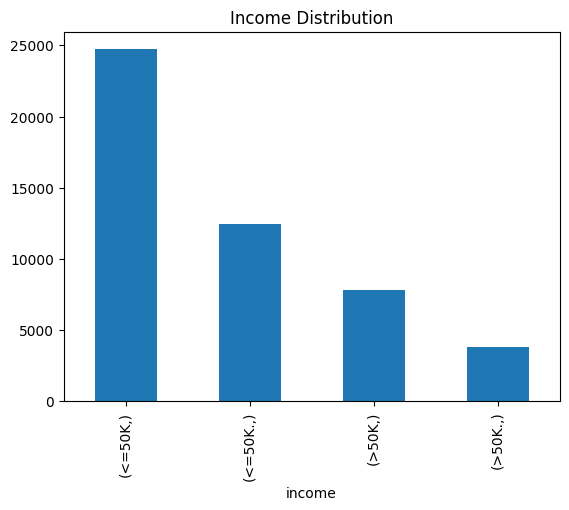

In [17]:
adult["data"]["targets"].value_counts().plot(kind="bar",title="Income Distribution")

In [26]:
df["income"].replace("<=50K.","<=50K",inplace=True)
df["income"].replace(">50K.",">50K",inplace=True)

C:\Users\britt\AppData\Local\Temp\ipykernel_37852\3189833568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].replace("<=50K.","<=50K",inplace=True)
C:\Users\britt\AppData\Local\Temp\ipykernel_37852\3189833568.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [29]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- age ---
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
---- workclass ---
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
---- fnlwgt ---
fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64
---- education ---
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th      

In [20]:
for ed in df.education.unique():
  print(ed,df[df.education==ed]["education-num"].unique())

Bachelors [13]
HS-grad [9]
11th [7]
Masters [14]
9th [5]
Some-college [10]
Assoc-acdm [12]
Assoc-voc [11]
7th-8th [4]
Doctorate [16]
Prof-school [15]
5th-6th [3]
10th [6]
1st-4th [2]
Preschool [1]
12th [8]


In [30]:
df.drop("education",axis=1,inplace=True)


In [31]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [32]:
missing_rows= df[df.workclass.isnull() & df.occupation.isnull()] #if you run this, you will notice they are almost on the same line.
print(missing_rows)

       age workclass  fnlwgt  education-num      marital-status occupation  \
32565   18       NaN  103497             10       Never-married        NaN   
32567   29       NaN  227026              9       Never-married        NaN   
32574   58       NaN  299831              9  Married-civ-spouse        NaN   
32583   72       NaN  132015              4            Divorced        NaN   
32596   65       NaN  191846              9  Married-civ-spouse        NaN   
...    ...       ...     ...            ...                 ...        ...   
48682   61       NaN  265201             10  Married-civ-spouse        NaN   
48769   21       NaN  212661             10       Never-married        NaN   
48800   73       NaN  144872              9  Married-civ-spouse        NaN   
48812   81       NaN   26711             11  Married-civ-spouse        NaN   
48838   64       NaN  321403              9             Widowed        NaN   

         relationship   race     sex  capital-gain  capital-los

In [23]:
dropped_df = df.drop(missing_rows.index)
dropped_df = dropped_df.drop( dropped_df[dropped_df["occupation"].isnull()].index) # this line is for missing 3 more lines.

# Preprocessing
1. Split dataset
2. Handle missing values
3. Normalize values
4. Encode categorical features